<a href="https://colab.research.google.com/github/neelkanthrawat/mlph2023-Exercises/blob/main/sheet07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheet 7

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn

# 1) Log-sum-exp and softmax

(b)

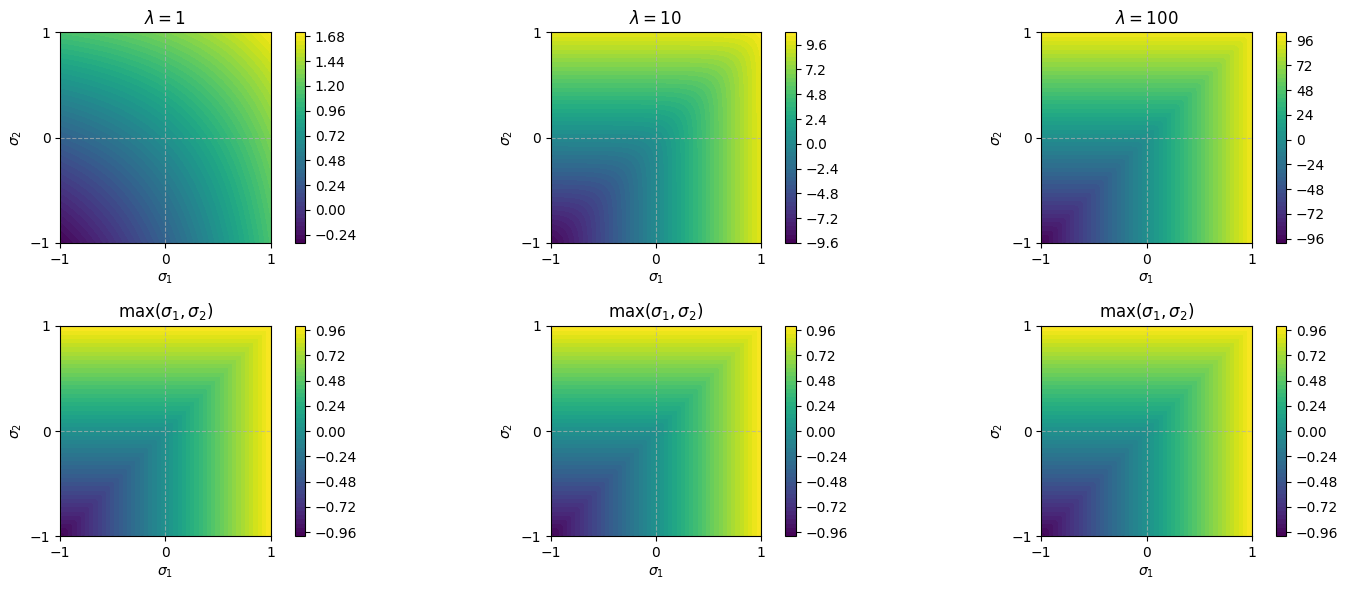

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def logsumexp(x, lamb=1):
    return torch.log(torch.sum(torch.exp(lamb * x)))

def set_up_axes(ax):
    ax.set_xlabel(r'$\sigma_1$')
    ax.set_ylabel(r'$\sigma_2$')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.grid(True, linestyle='--', alpha=0.7)

# Set up a grid of points in [-1, 1] x [-1, 1]
sigma_values = np.linspace(-1, 1, 100)
sigma1, sigma2 = np.meshgrid(sigma_values, sigma_values)

# Calculate the functions
lambda_values = [1, 10, 100]

fig, axs = plt.subplots(2, len(lambda_values), figsize=(15, 6))

for i, lamb in enumerate(lambda_values):
    lse_values = np.zeros_like(sigma1)
    max_values = np.maximum(sigma1, sigma2)

    for j in range(len(sigma_values)):
        for k in range(len(sigma_values)):
            lse_values[j, k] = logsumexp(torch.tensor([sigma1[j, k], sigma2[j, k]]), lamb).item()

    # Plot logsumexp
    c1 = axs[0, i].contourf(sigma1, sigma2, lse_values, levels=50, cmap='viridis')
    set_up_axes(axs[0, i])
    axs[0, i].set_title(r'$\lambda = {}$'.format(lamb))
    fig.colorbar(c1, ax=axs[0, i])

    # Plot max
    c2 = axs[1, i].contourf(sigma1, sigma2, max_values, levels=50, cmap='viridis')
    set_up_axes(axs[1, i])
    axs[1, i].set_title(r'$\max(\sigma_1, \sigma_2)$')
    fig.colorbar(c2, ax=axs[1, i])

plt.tight_layout()
plt.show()

(c)

In [9]:
# def softmax(x, axis, lamb=1):
#     # TODO: implement the softmax function. Axis should specify along which axis the sums should be computed.
#     exp_values = torch.exp(lamb * x)
#     softmax_values = exp_values / exp_values.sum(dim=axis, keepdim=True)
#     return softmax_values


# # TODO: compute the argmax of each gridpoint in one-hot form
# onehot_argmax = to_onehot(np.argmax(xy, axis=-1))

# # TODO: make the plots as specified on the sheet (nicest is in a grid which you can get using plt.subplots)

# # plot the softmax
# fig, axs = plt.subplots(2, 4, figsize=(17, 7))

# # plot the onehot argmax


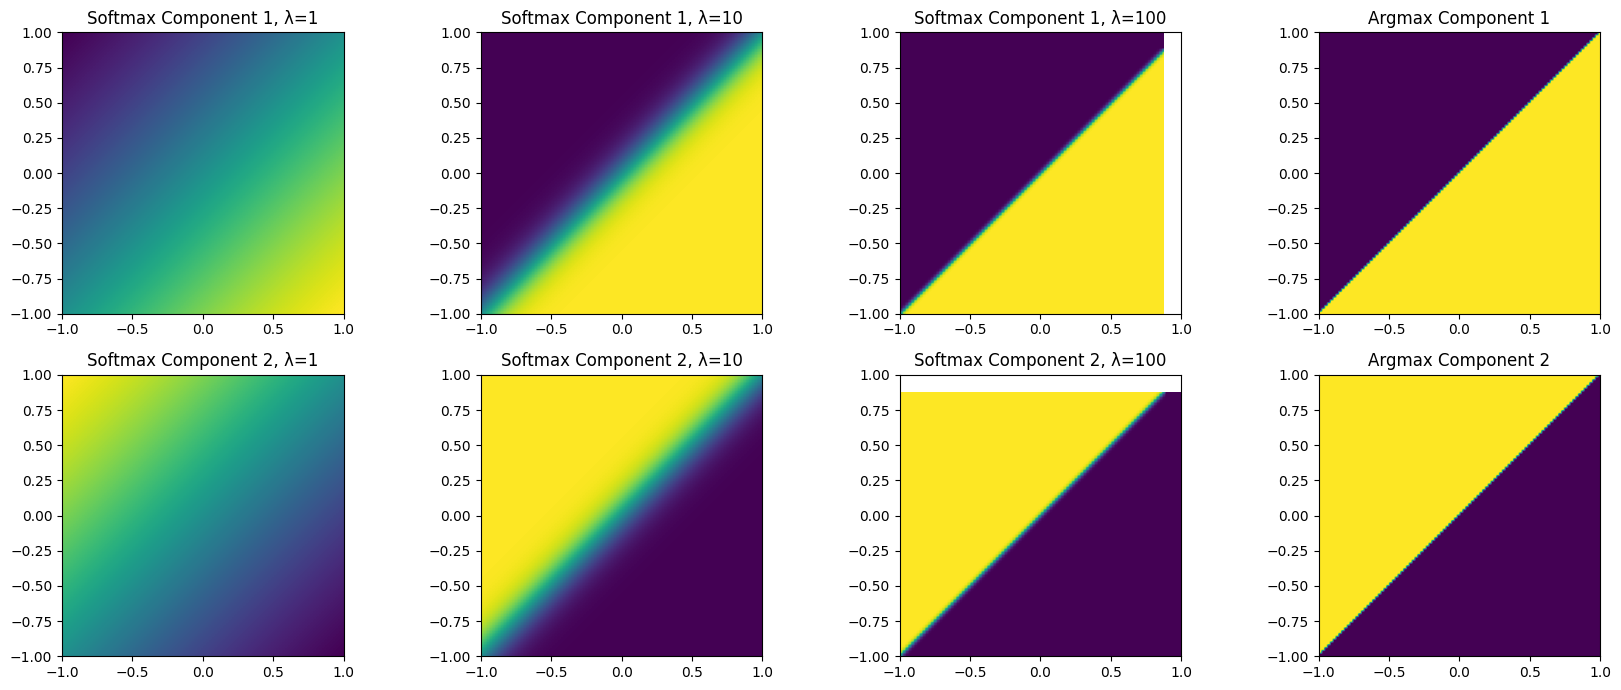

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def softmax(x, axis, lamb=1):
    exp_values = torch.exp(lamb * x)
    softmax_values = exp_values / torch.sum(exp_values, dim=axis, keepdim=True)
    return softmax_values

def to_onehot(indices):
    onehot = torch.zeros(indices.size() + (2,))
    onehot.scatter_(-1, indices.unsqueeze(-1), 1)
    return onehot

# Set up a grid of points in [-1, 1] x [-1, 1]
sigma_values = np.linspace(-1, 1, 100)
sigma1, sigma2 = np.meshgrid(sigma_values, sigma_values)
xy = torch.tensor(np.stack([sigma1, sigma2], axis=-1), dtype=torch.float32)

# Compute the softmax components
lambda_values = [1, 10, 100]
softmax_components = []

for lamb in lambda_values:
    softmax_values = softmax(xy, axis=-1, lamb=lamb)
    softmax_components.append(softmax_values)

# Compute the argmax of each gridpoint in one-hot form
onehot_argmax = to_onehot(np.argmax(xy, axis=-1))

# Plot the softmax components and argmax components
fig, axs = plt.subplots(2, 4, figsize=(17, 7))

for i, lamb in enumerate(lambda_values):
    axs[0, i].imshow(softmax_components[i][:, :, 0], extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
    axs[0, i].set_title(f'Softmax Component 1, λ={lamb}')

    axs[1, i].imshow(softmax_components[i][:, :, 1], extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
    axs[1, i].set_title(f'Softmax Component 2, λ={lamb}')

# Plot the argmax components
axs[0, -1].imshow(onehot_argmax[:, :, 0], extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
axs[0, -1].set_title(f'Argmax Component 1')

axs[1, -1].imshow(onehot_argmax[:, :, 1], extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
axs[1, -1].set_title(f'Argmax Component 2')

plt.tight_layout()
plt.show()


# 2) Top tagging with Point Clouds

See https://github.com/heidelberg-hepml/ml-tutorials for solutions

# 3) CNNs for Galaxy Classification

In [ ]:
import h5py
import numpy as np
import torch

label_names = [
    'Disk, Face-on, No Spiral',
    'Smooth, Completely round',
    'Smooth, in-between round',
    'Smooth, Cigar shaped',
    'Disk, Edge-on, Rounded Bulge',
    'Disk, Edge-on, Boxy Bulge',
    'Disk, Edge-on, No Bulge',
    'Disk, Face-on, Tight Spiral',
    'Disk, Face-on, Medium Spiral',
    'Disk, Face-on, Loose Spiral'
]
n_classes = len(label_names)

# To get the images and labels from file
with h5py.File('data07/Galaxy10.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])
images = images.astype(np.float32)

# comply to (batch, channel, height, width) convention of pytorch
images = np.moveaxis(images, -1, 1)
# convert to torch
images = torch.from_numpy(images)
labels = torch.from_numpy(labels)

print(f'{images.shape=}, {labels.shape=}')

print(labels.shape, images.shape)
# TODO: print the number of samples for each class

In [ ]:
from matplotlib import pyplot as plt

# TODO: plot some samples of each class
itemindex = torch.where(labels == 3)
itemindex[:3]

samples_per_class = 3
fig, axss = plt.subplots(samples_per_class, n_classes, figsize=(n_classes * 2, samples_per_class * 2))
for label, (label_name, axs) in enumerate(zip(label_names, axss.T)):
    idx = torch.where(labels==label)[0][:samples_per_class] # take samples_per_class first occurences
    for i, (ind, ax) in enumerate(zip(idx, axs)):
        ax.imshow(images[ind].long().moveaxis(0, -1))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title(label_name.replace(',',',\n'))
plt.tight_layout()
plt.show()

In [ ]:
from torchvision.transforms import Normalize

# TODO: Compute the mean and standard deviation per channel over the dataset

# stds = images.moveaxis(1, 0).reshape(3, -1).std(axis=1)
# means = images.moveaxis(1, 0).reshape(3, -1).mean(axis=1)
stds, means = torch.tensor([37.5412, 31.3756, 26.3283]), torch.tensor([27.7014, 23.8241, 18.1425])
print(stds, means)

# TODO: Normalize the images
normalize = Normalize(means, stds)
images_normalized = normalize(images)

In [ ]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

n_samples = len(labels)

# TODO: split the data in training and validation sets, stratifying by the labels
train_idx, val_idx = train_test_split(np.arange(n_samples), test_size=0.1, stratify=labels)

# TODO: create pytorch datasets for training and validation
train_dataset = TensorDataset(images_normalized[train_idx].float(), labels[train_idx].long())
val_dataset = TensorDataset(images_normalized[val_idx].float(), labels[val_idx].long())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

#TODO: implement a small CNN as specified on the sheet


(b)

In [ ]:
# TODO: create DataLoaders for train and val, use a batch size of 16

# TODO: instantiate the model, optimizer and criterion

# TODO: implement the training loop, validating after every epoch, and make the requested plots
from sklearn.metrics import confusion_matrix


(c)

In [ ]:
# TODO: redo (c) with a ResNet
# Hint: Training is probably quicker on google colab (https://colab.research.google.com/)

